# Creating a Simple Visualization

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

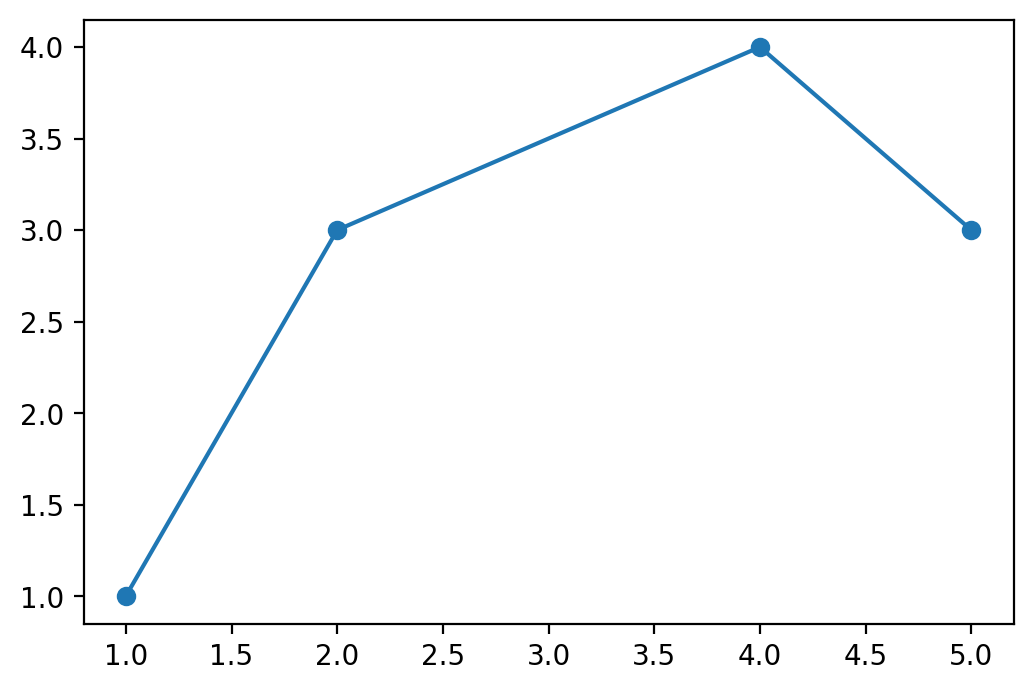

In [2]:
# create a figure
plt.figure(dpi=200)
plt.plot([1, 2, 4, 5], [1, 3, 4, 3], '-o')
plt.savefig('simple_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Creating a Pie Chart for Water Usage

In [3]:
# load the data
df = pd.read_csv('Datasets/water_usage.csv')
df.head()

,Unnamed: 0,Usage,Percentage
0,0,Leak,12
1,1,Clothes Washer,17
2,2,Faucet,19
3,3,Shower,20
4,4,Toilet,24


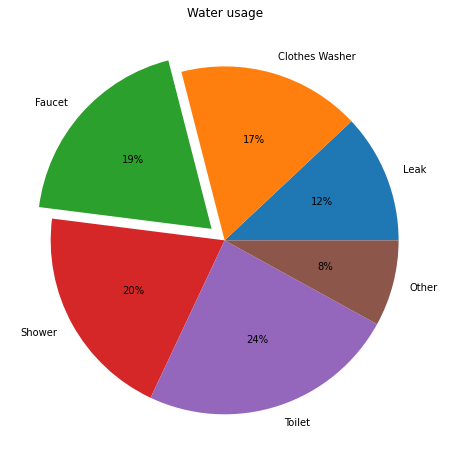

In [4]:
# Use a pie chart to visualize water usage
plt.figure(figsize=(8, 8))
plt.pie('Percentage', data=df, explode=(0, 0, 0.1, 0, 0, 0), labels='Usage', autopct='%.0f%%')
plt.title('Water usage')
plt.show()

# Using a Scatter Plot to Visualize Correlation between Various Animals

In [5]:
data = pd.read_csv('Datasets/anage_data.csv')
data.head()

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,...,NaN,0.19,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
1,1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,...,NaN,0.30,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN
2,2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,...,NaN,8.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
3,3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,...,NaN,0.50,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN
4,4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,...,NaN,28.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN


In [6]:
# Filter the data so that you end up with samples containing a body mass and a maximum longevity
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]

In [7]:
# Sort the data according to the animal class
amphibia = data[data['Class'] == 'Amphibia']
aves = data[data['Class'] == 'Aves']
mammalia = data[data['Class'] == 'Mammalia']
reptilia = data[data['Class'] == 'Reptilia']

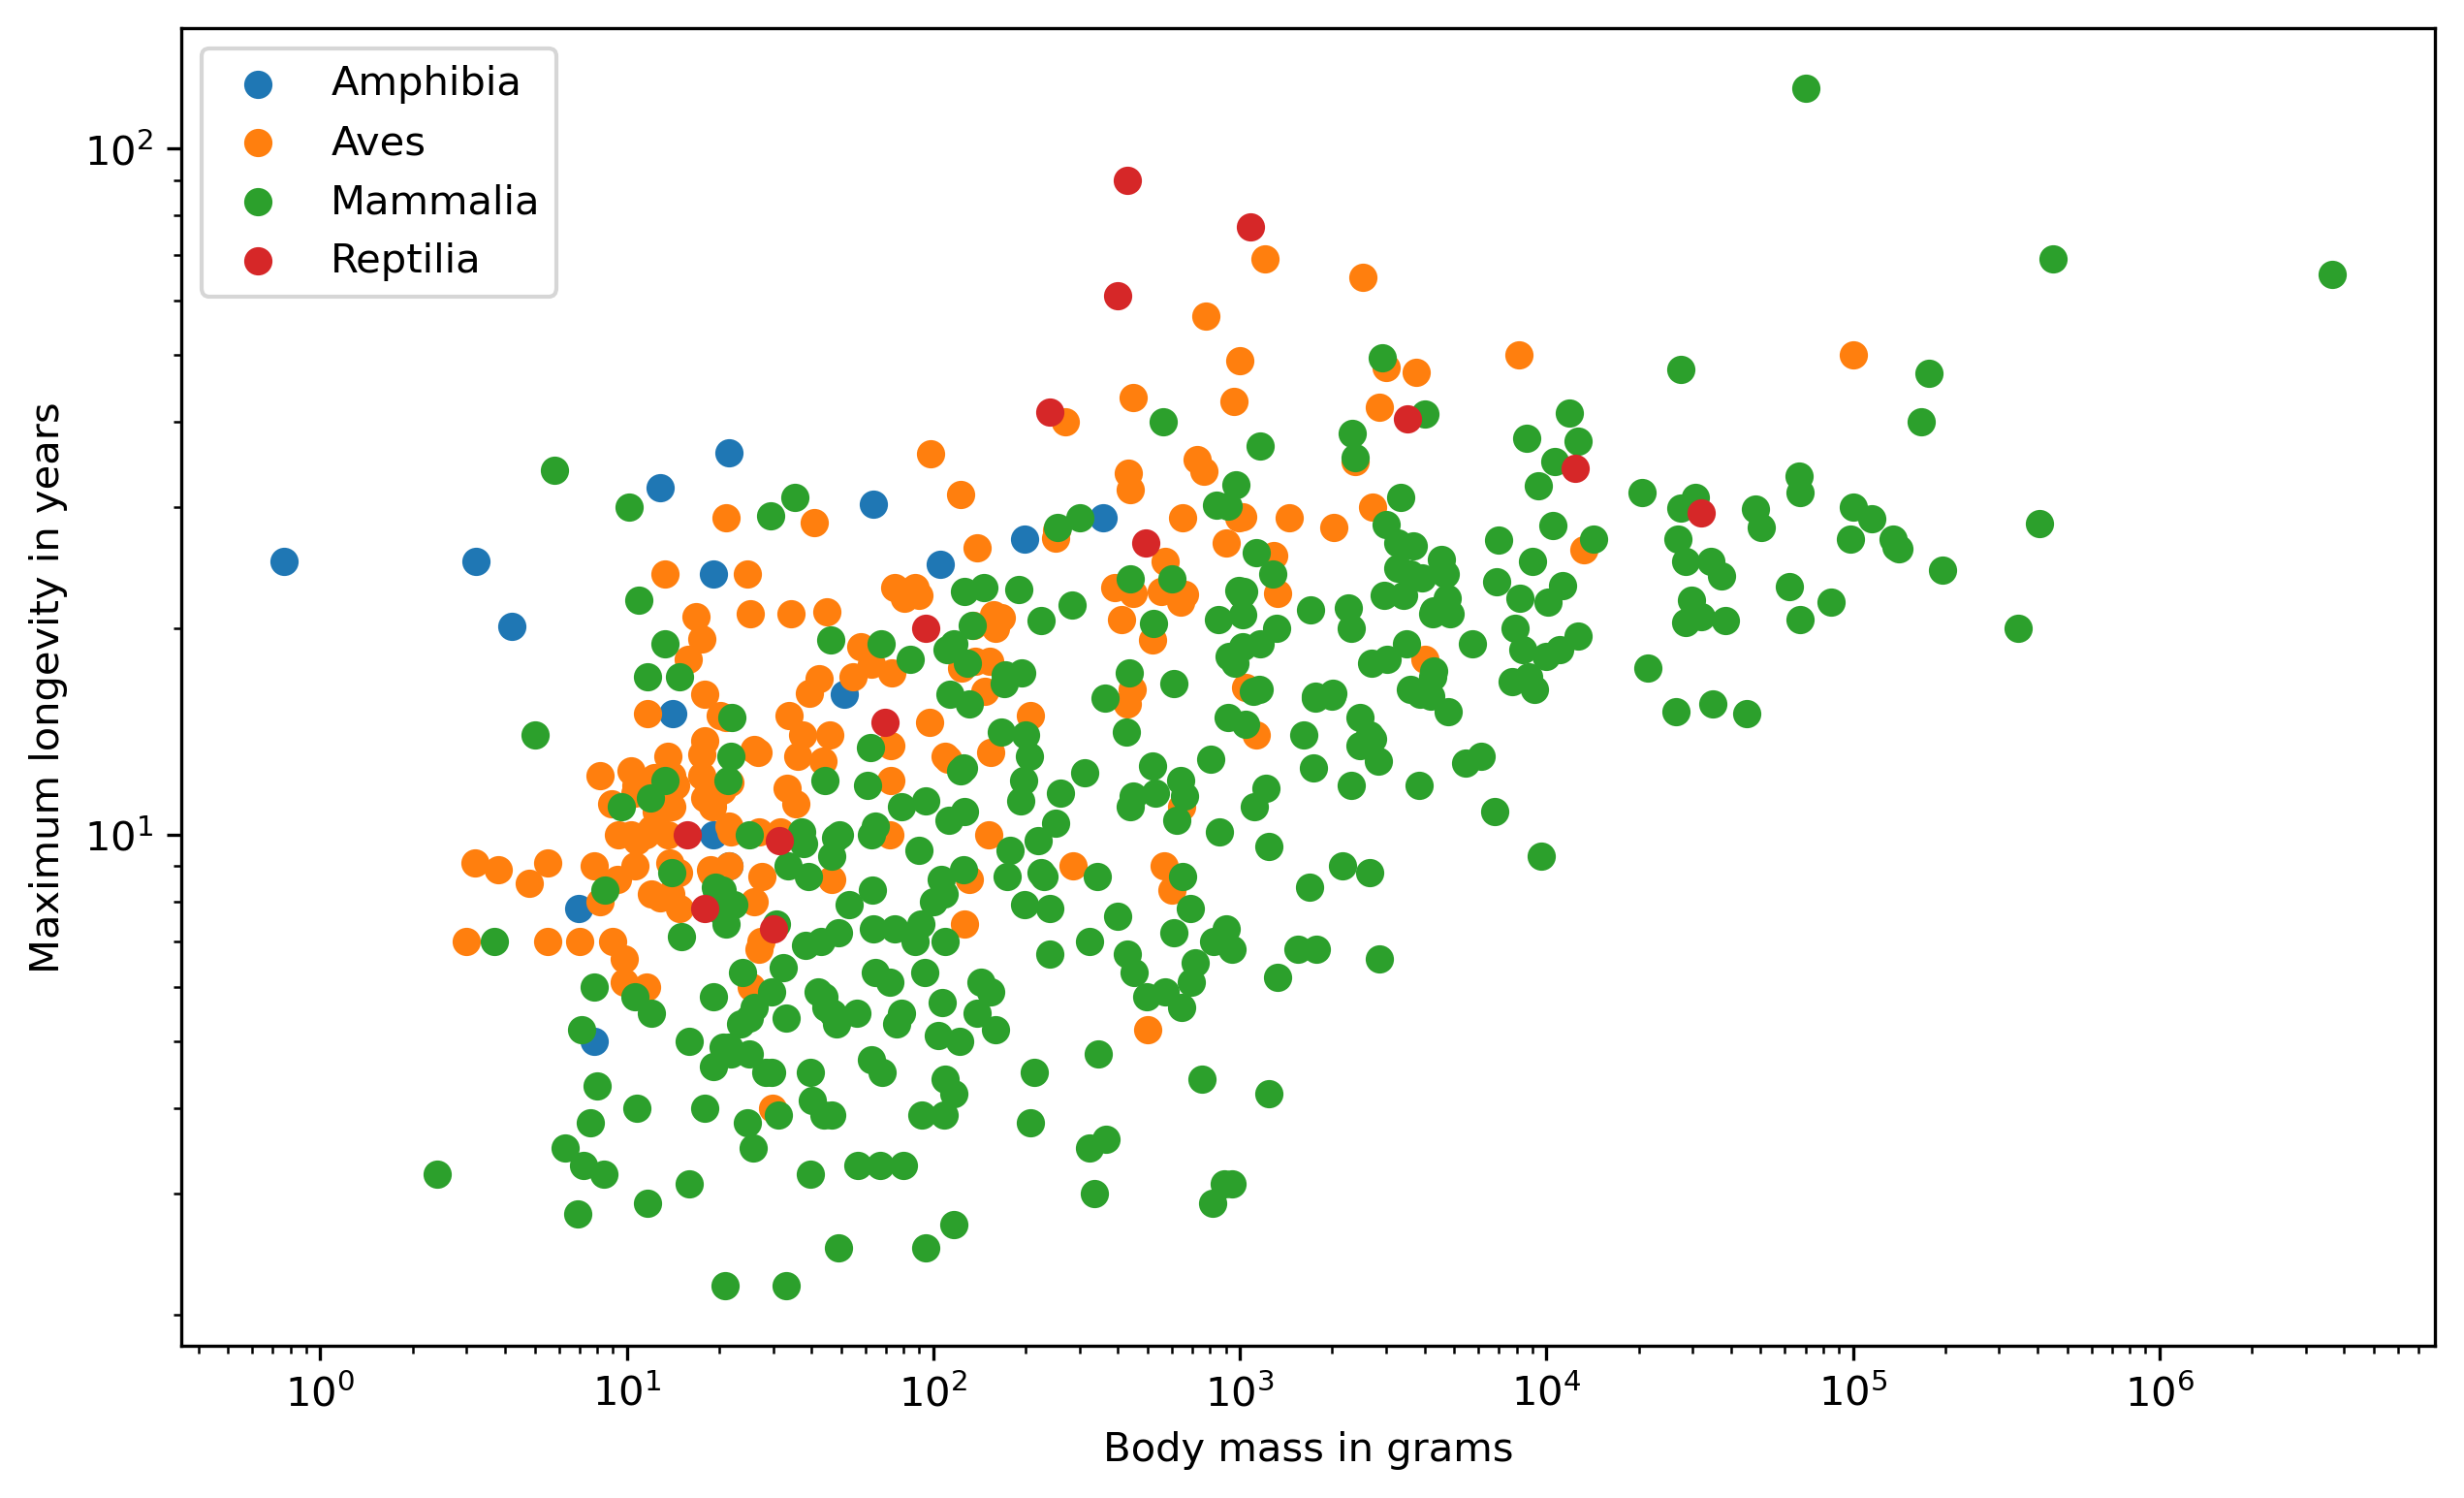

In [8]:
# Create a scatter plot visualizing the correlation between the body mass and the maximum longevity
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(amphibia[mass], amphibia[longevity], label='Amphibia')
plt.scatter(aves[mass], aves[longevity], label='Aves')
plt.scatter(mammalia[mass], mammalia[longevity], label='Mammalia')
plt.scatter(reptilia[mass], reptilia[longevity], label='Reptilia')
plt.legend()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
plt.show()

# Working on Radar Charts

In [9]:
# The following dataset contains ratings of five different attributes for four employees
data = pd.DataFrame({
    'Employee': ['Alex', 'Alice', 'Chris', 'Jennifer'],
    'Efficiency': [5, 4, 4, 3,],
    'Quality': [5, 5, 3, 3],
    'Commitment': [5, 4, 4, 4],
    'Responsible Conduct': [4, 4, 4, 3],
    'Cooperation': [4, 3, 4, 5]
})

In [10]:
# Create angle values and close the plot
attributes = list(data.columns[1:])
values = list(data.values[:, 1:])
employees = list(data.values[:, 0])
angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
# Close the plot
angles = angles + angles[:1]
values = np.asarray(values)
values = np.concatenate([values, values[:, 0:1]], axis=1)

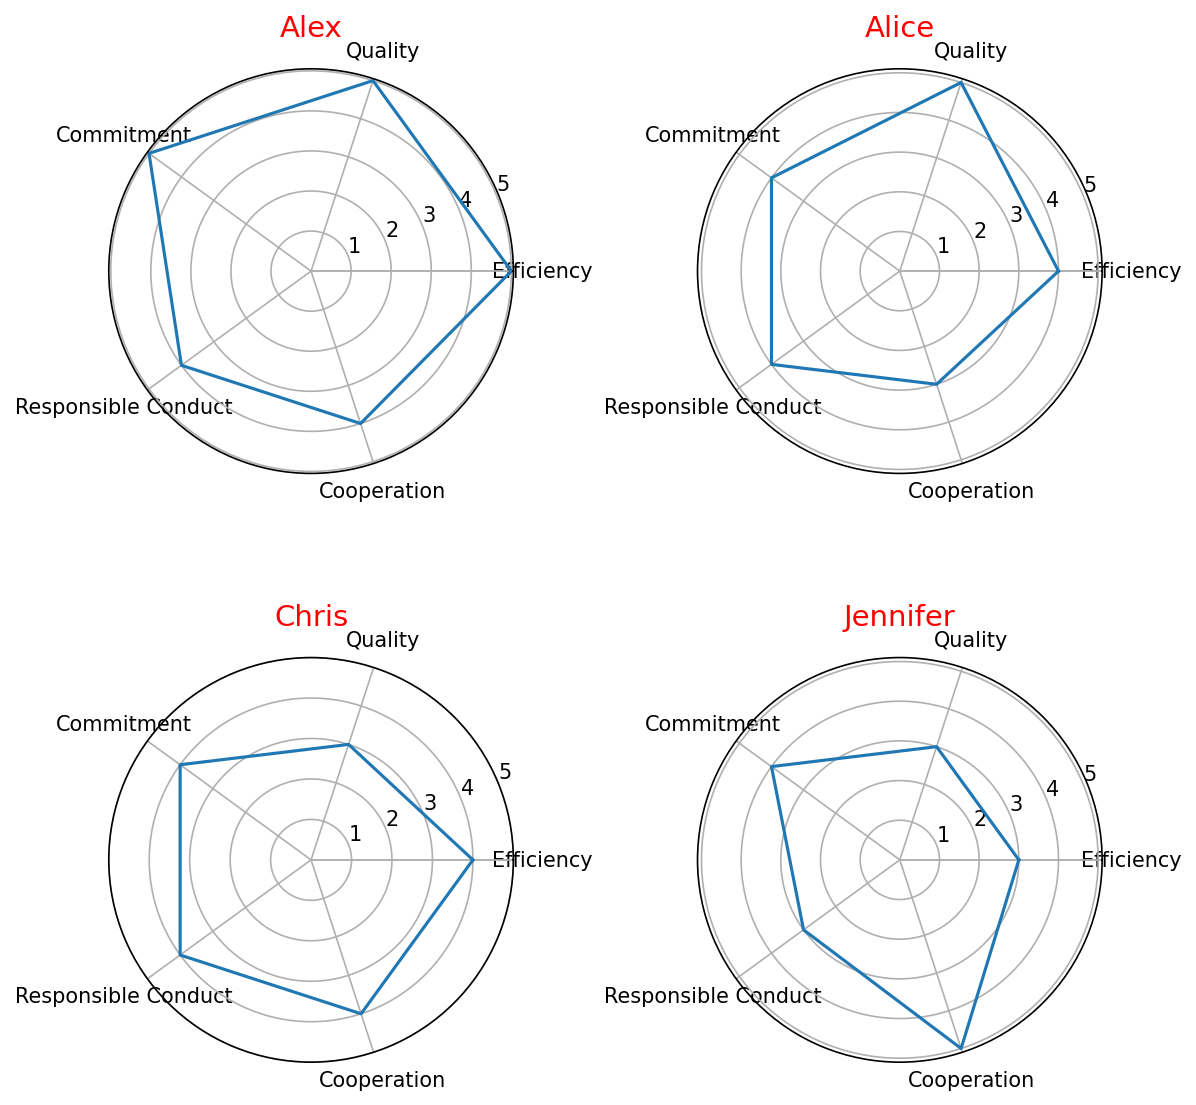

In [11]:
# Create subplots with the polar projection
plt.figure(figsize=(8, 8), dpi=150)
for i in range(4):
    ax = plt.subplot(2, 2, i+1, polar=True)
    ax.plot(angles, values[i])
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_xticks(angles)
    ax.set_xticklabels(attributes)
    ax.set_title(employees[i], fontsize=14, color='r')
plt.tight_layout()
plt.show()